<a href="https://colab.research.google.com/github/pi-mishra/PNB_stock_prediction/blob/main/PNB_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

The Punjab National Bank (PNB) aims to develop a regression and time series forecasting model to predict the adjusted close price of its stock. The data for this project is extracted from Yahoo Finance and consists of the following columns: Date, Open, High, Low, Close, Adj Close, and Volume. The objective is to build a robust predictive model that accurately forecasts the future adjusted close prices of PNB stock based on historical data.

Data Description:

The dataset provided by Yahoo Finance contains historical information related to PNB stock prices. The data is structured with the following columns:

1. Date: Represents the date on which the stock data was recorded.
2. Open: Indicates the opening price of the PNB stock on a particular day.
3. High: Represents the highest price reached by the PNB stock during the trading day.
4. Low: Indicates the lowest price reached by the PNB stock during the trading day.
5. Close: Represents the closing price of the PNB stock on a particular day.
6. Adj Close: Represents the adjusted closing price of the PNB stock on a particular day, which accounts for dividends, stock splits, and other corporate actions.
7. Volume: Indicates the total number of shares traded on a particular day.

The dataset covers a specific time range, including historical data from various trading days. The goal of this project is to utilize this historical information to develop a regression and time series forecasting model that can accurately predict the adjusted close price of PNB stock for future dates based on the given features (Open, High, Low, Close, and Volume) from the historical data.

In [104]:
#importing important packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [105]:
#reading the data

df = pd.read_csv('/content/drive/MyDrive/yes_bank/PNB.NS.csv')

In [106]:
#checking the first 5 rows

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,9.60,9.74,9.55,9.57,6.875042,825970.0
1,2002-07-02,9.60,9.67,9.45,9.50,6.824753,653405.0
2,2002-07-03,9.46,9.57,9.46,9.51,6.831936,305880.0
3,2002-07-04,9.56,9.90,9.52,9.72,6.982801,2413155.0
4,2002-07-05,9.90,9.95,9.60,9.85,7.076193,3460955.0


In [107]:
#getting the shape of data

df.shape

(5215, 7)

In [108]:
#checking null rows

df.isnull().mean()

Date         0.000000
Open         0.004602
High         0.004602
Low          0.004602
Close        0.004602
Adj Close    0.004602
Volume       0.004602
dtype: float64

In [109]:
df.dropna(subset=['Open', 'Adj Close', 'Volume'], inplace=True)

In [110]:
df.duplicated().sum()

0

In [111]:
#getting the datatype of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5191 entries, 0 to 5214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5191 non-null   object 
 1   Open       5191 non-null   float64
 2   High       5191 non-null   float64
 3   Low        5191 non-null   float64
 4   Close      5191 non-null   float64
 5   Adj Close  5191 non-null   float64
 6   Volume     5191 non-null   float64
dtypes: float64(6), object(1)
memory usage: 324.4+ KB


In [112]:
#changing the datatype of date column

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [113]:
#getting the central tendency and dispersion of data

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5.191000e+03
mean,105.283965,107.184781,103.317891,105.176082,93.817473,1.865893e+07
std,60.235406,61.093061,59.350666,60.194650,54.858895,3.687519e+07
min,7.450000,8.190000,7.450000,8.090000,5.811817,0.000000e+00
25%,54.125000,55.375000,52.799999,53.845001,48.399999,2.726366e+06
50%,94.120003,95.930000,92.300003,94.099998,80.418854,6.138000e+06
75%,149.075005,151.529999,146.250000,148.800003,140.278130,1.867619e+07
max,275.309998,279.980011,271.519989,277.079987,238.678467,5.118155e+08


# Data Visualisation

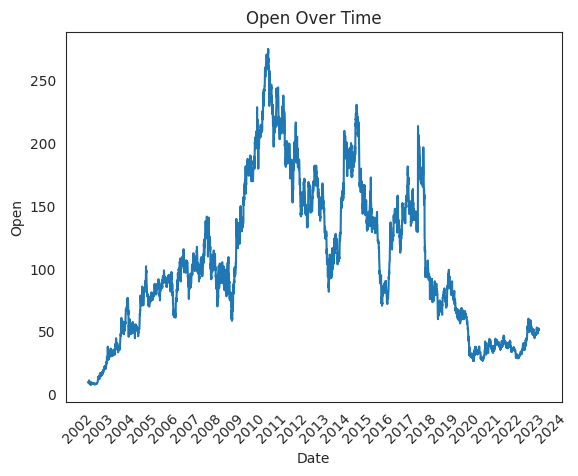

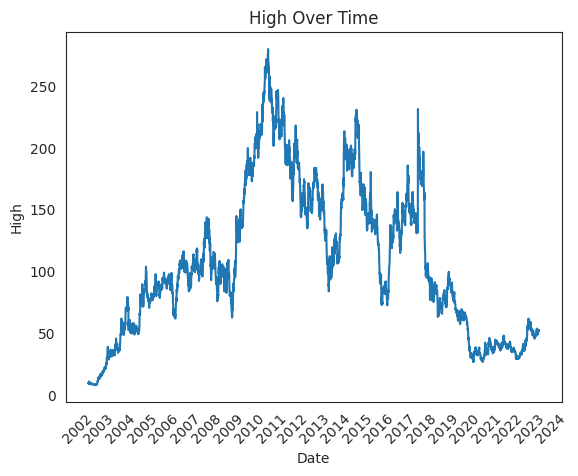

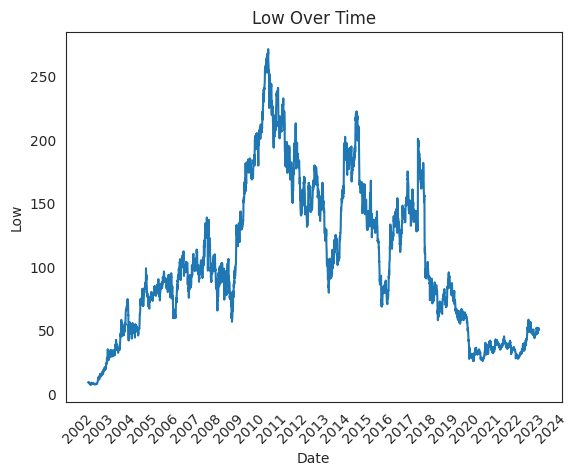

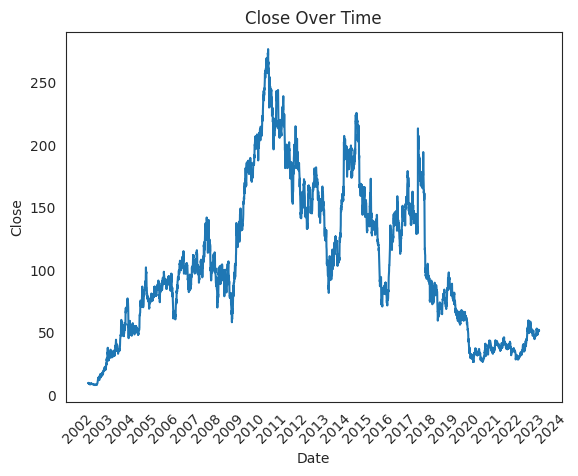

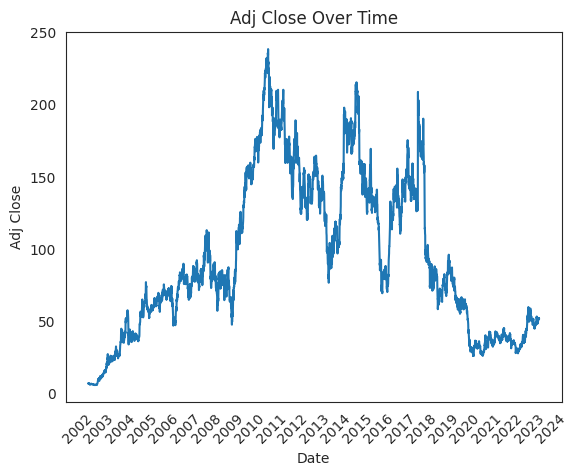

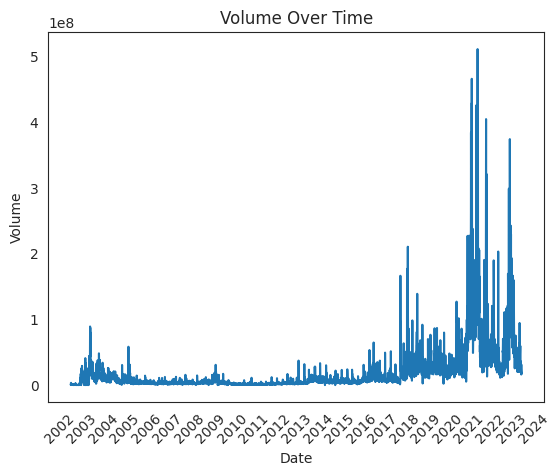

In [114]:
#Plotting line graph to get the change in data over the years

col = ['Open','High','Low','Close','Adj Close','Volume']

for i in col:
    dates = df['Date']
    col_name = df[i]

    plt.plot(dates, col_name)

    plt.title(f'{i} Over Time')
    plt.xlabel('Date')
    plt.ylabel(i)

    # Set x-axis ticks to display years only
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.xticks(rotation=45)
    plt.show()

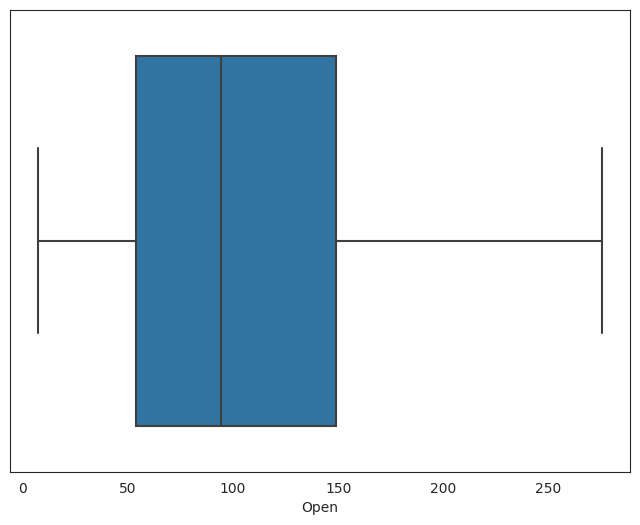

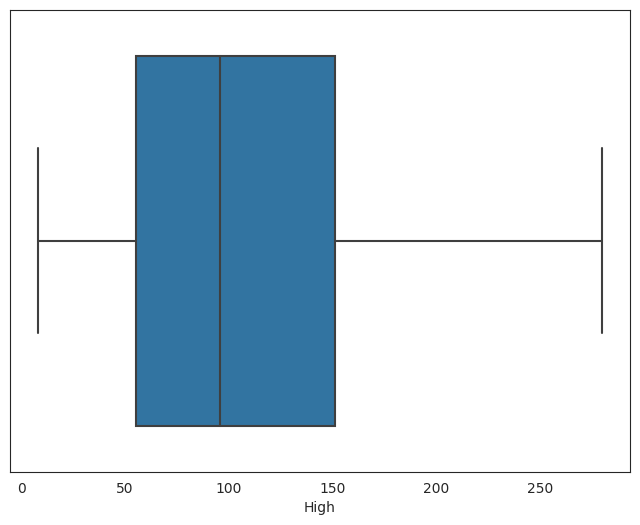

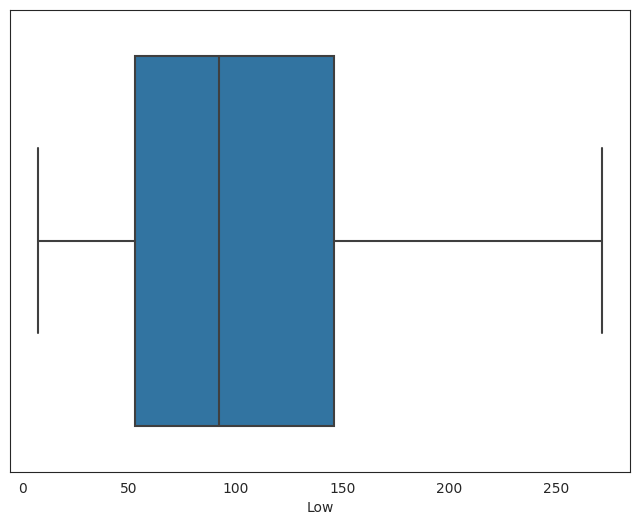

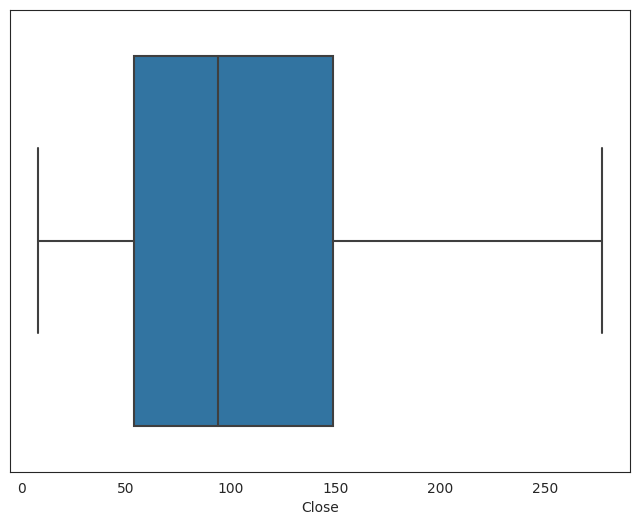

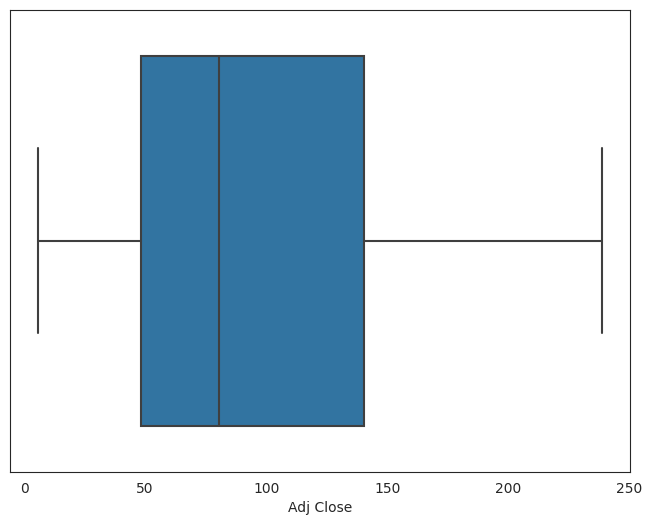

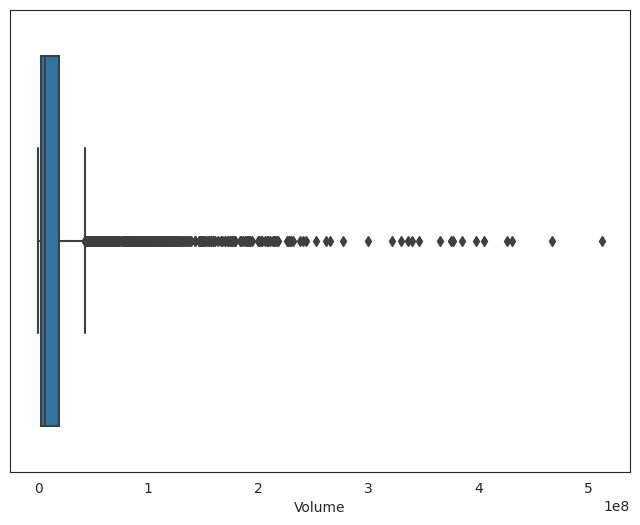

In [115]:
#checking for outliers

for i in col:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[i])
  plt.show()

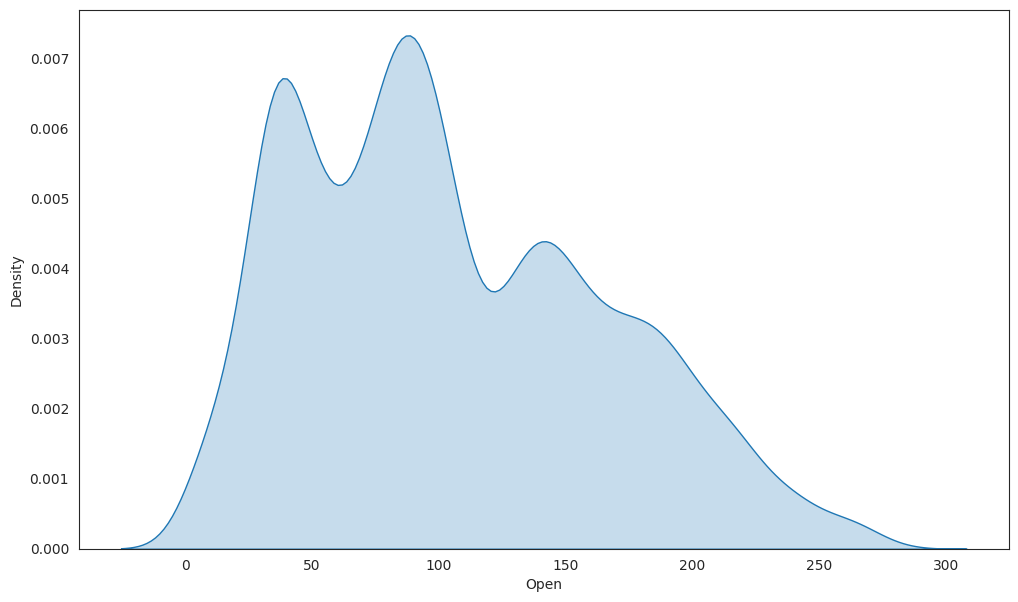

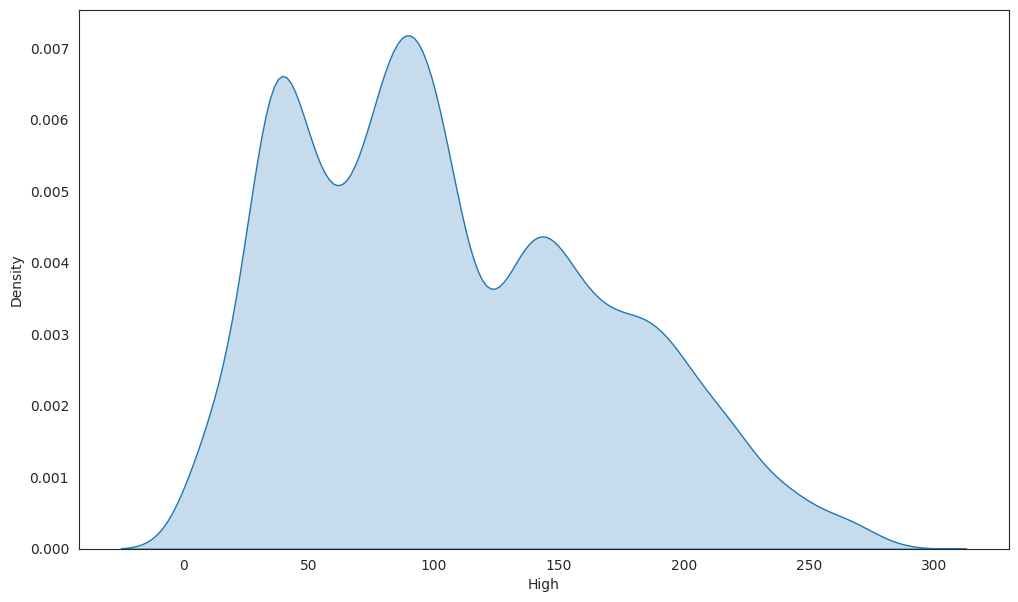

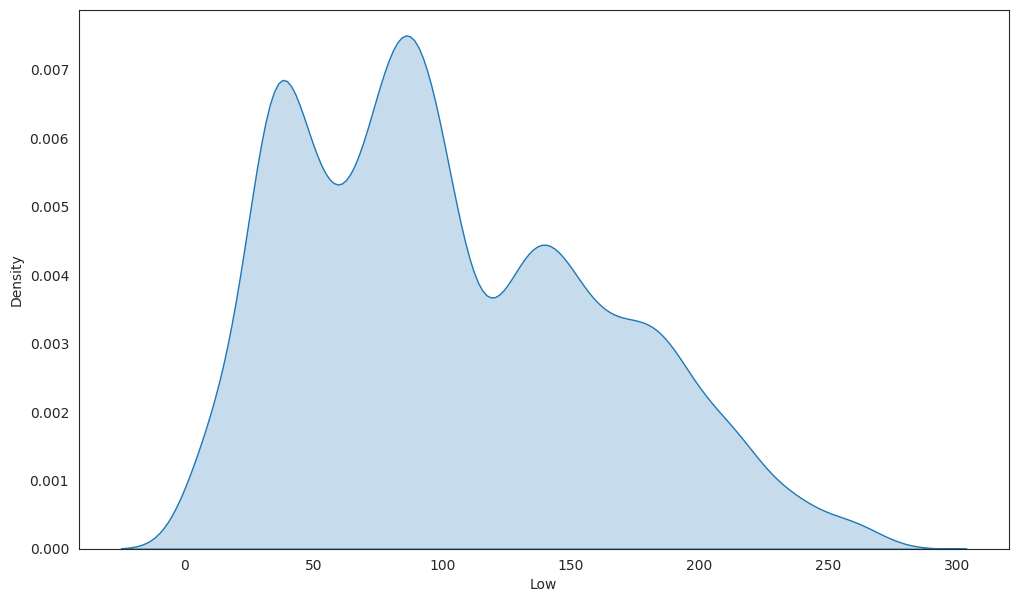

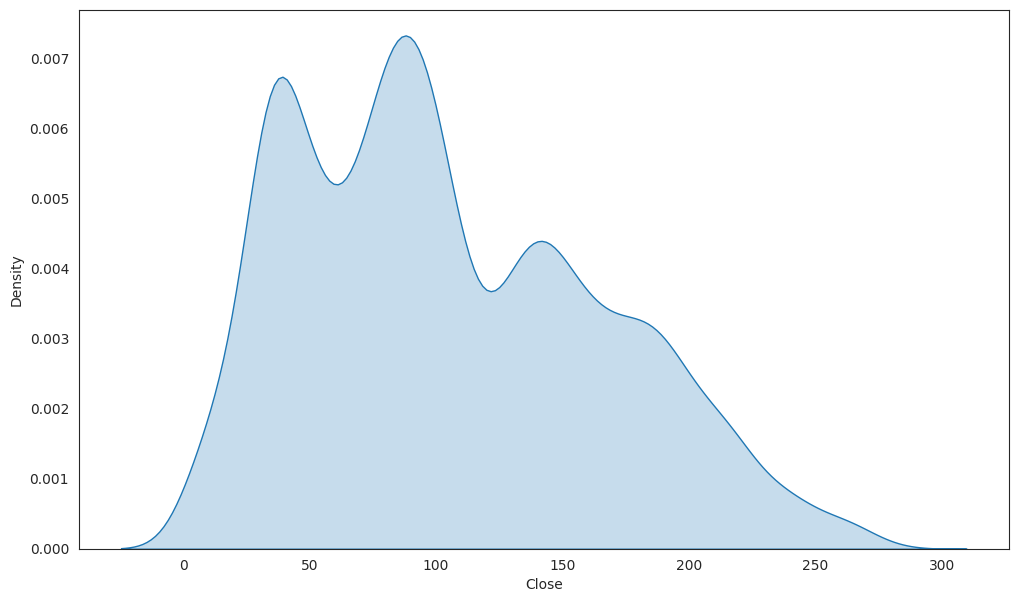

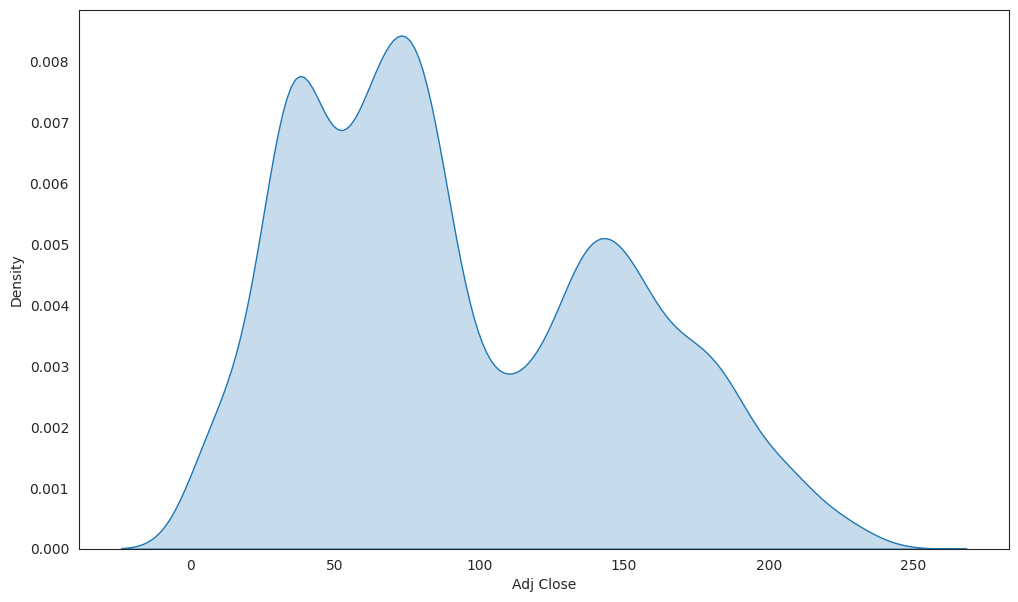

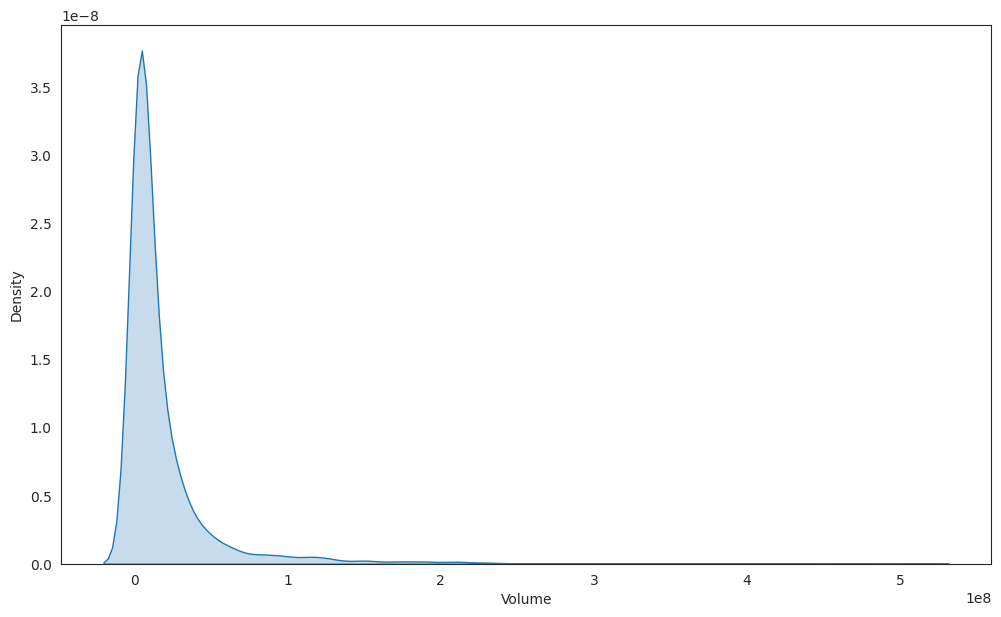

In [116]:
#KDE plot to check the dispersion

for i in col:
  plt.figure(figsize=(12,7))
  sns.kdeplot(data=df[i], shade=True)

In [117]:
#checking for skewness of data

for i in col:
    skewness = df[i].skew()
    print('Skewness',i,':', skewness)

Skewness Open : 0.4858617256199295
Skewness High : 0.4752441579069143
Skewness Low : 0.49468857775745956
Skewness Close : 0.4852152223175633
Skewness Adj Close : 0.4508550079311453
Skewness Volume : 5.314210729474834


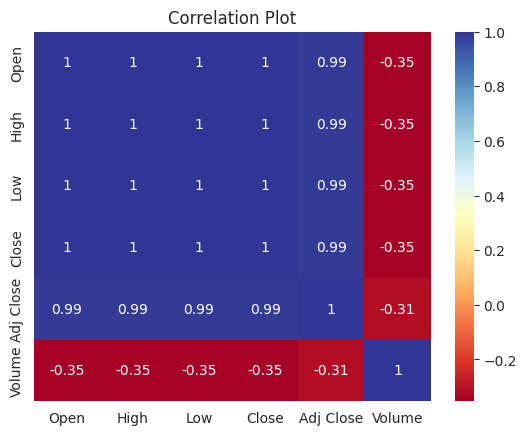

In [118]:
#checking for coorelation

correlation_matrix = df.corr()
sns.set_style("white")
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title('Correlation Plot')
plt.show()

## Data transformation and scaling

In [119]:
#Extracting year, month and day

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop('Date', axis=1, inplace=True)

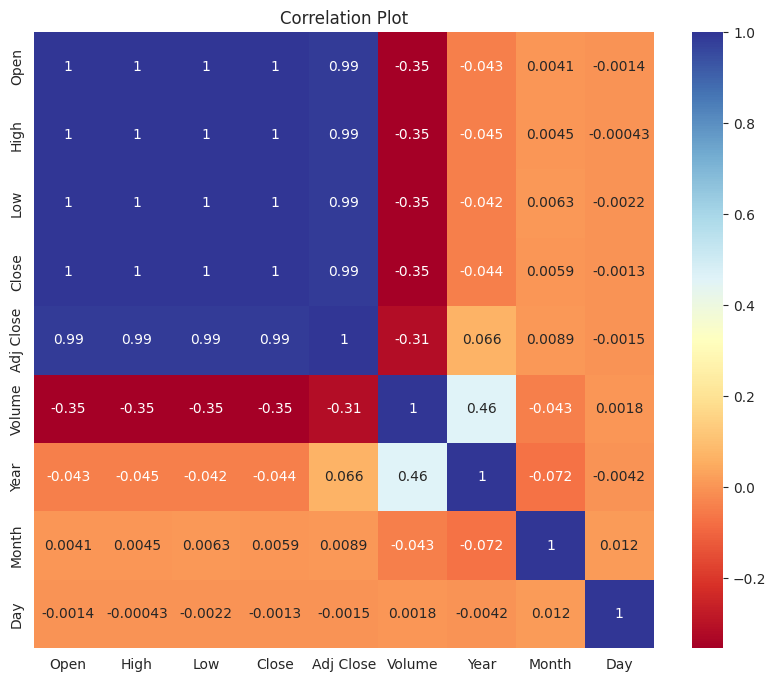

In [120]:
#checking for coorelation

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))

sns.set_style("white")
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title('Correlation Plot')
plt.show()

In [121]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Open,1.000000,0.999356,0.999411,0.998832,0.988382,-0.352610,-0.042840,0.004095,-0.001439
High,0.999356,1.000000,0.999166,0.999521,0.988735,-0.349856,-0.045315,0.004468,-0.000432
Low,0.999411,0.999166,1.000000,0.999471,0.988999,-0.353474,-0.041856,0.006282,-0.002171
Close,0.998832,0.999521,0.999471,1.000000,0.989165,-0.351325,-0.044419,0.005940,-0.001272
Adj Close,0.988382,0.988735,0.988999,0.989165,1.000000,-0.311933,0.065839,0.008881,-0.001526
Volume,-0.352610,-0.349856,-0.353474,-0.351325,-0.311933,1.000000,0.459913,-0.043324,0.001832
Year,-0.042840,-0.045315,-0.041856,-0.044419,0.065839,0.459913,1.000000,-0.071527,-0.004184
Month,0.004095,0.004468,0.006282,0.005940,0.008881,-0.043324,-0.071527,1.000000,0.012212
Day,-0.001439,-0.000432,-0.002171,-0.001272,-0.001526,0.001832,-0.004184,0.012212,1.000000


In [122]:
df.drop(['High','Low','Close'], axis=1, inplace=True)

In [123]:
#defining x and y axis

x= df.drop(['Adj Close'],axis=1).values
y= df['Adj Close'].values

In [124]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size= 0.20, random_state=10)

In [125]:
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model and Evaluation

In [141]:
def get_regression_metrics(y_true, y_pred):
  """
  Get regression metrics for a given set of true and predicted values.

  Args:
    y_true: The true values.
    y_pred: The predicted values.

  Returns:
    A table containing the following metrics:
      * R score: The coefficient of determination.
      * Adjusted R score: The adjusted coefficient of determination.
      * MSE: The mean squared error.
      * RMSE: The root mean squared error.
      * MAE: The mean absolute error.
  """

  metrics = {}
  metrics["R score"] = r2_score(y_true, y_pred)
  metrics["Adjusted R score"] = 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true)-1) / (len(y_true) - x_test.shape[1] - 1)
  metrics["MSE"] = mean_squared_error(y_true, y_pred)
  metrics["RMSE"] = np.sqrt(mean_squared_error(y_true, y_pred))
  metrics["MAE"] = mean_absolute_error(y_true, y_pred)

  return pd.DataFrame(metrics, index=["Metric"])


In [142]:
#linear regression

#applying LinerRegression and fitting the model
reg = LinearRegression()
reg.fit(x_train_scaled,y_train)

#predicting the model
y_predict_linear_regression = reg.predict(x_test_scaled)

#getting the regression metrix
get_regression_metrics(y_test,y_predict_linear_regression)

,R score,Adjusted R score,MSE,RMSE,MAE
Metric,0.989386,0.989335,32.736514,5.721583,4.798022
